### Red Wine quality prediction

This  is a problem of predicting the quality of the wine given the features about it. 
This dataset is a public one and isrelated to red variants of the Portuguese "Vinho Verde" wine. 
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).





In [1]:
#Importing packages needed for the execution.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, make_scorer, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading dataset
wine = pd.read_csv('wine_quality_classification.csv')

In [3]:
#Glance through the data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Data contains 12 columns and 1599 rows. 

## **Let's analyze the data by graphical methods. We will get a decent idea about the data in hand**

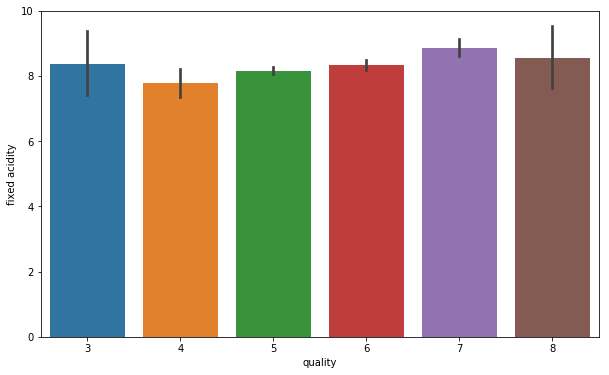

In [6]:
#Let us analyze the fixed acidity against the quality of the the wine.  
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

#### We see that fixed acidity does not give any specification to classify the quality.

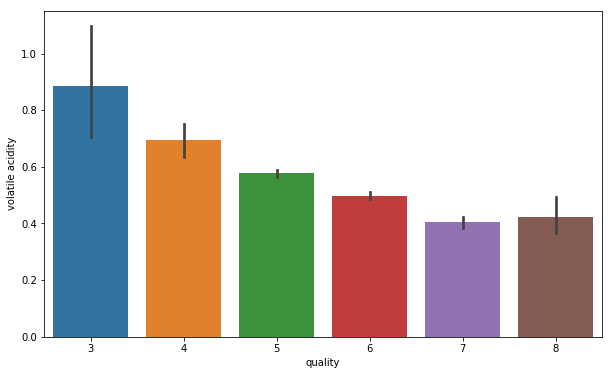

In [7]:
#Similarly, we check for the similar effect for volatile acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

#### Here we see decreasing trend in volatile acidity as we go higher the quality 

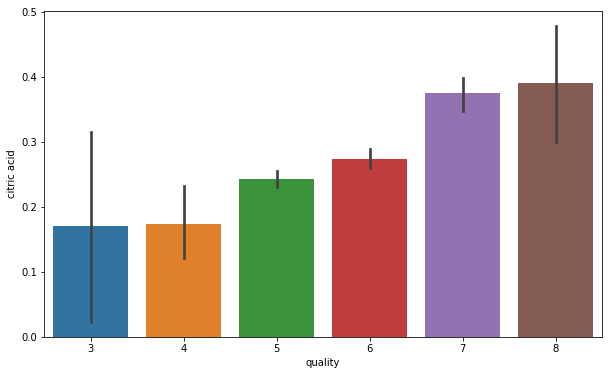

In [8]:
#Let us also take in account the citric acid quantity against the quality of red wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

#### Composition of citric acid go higher as we go higher in the quality of the wine

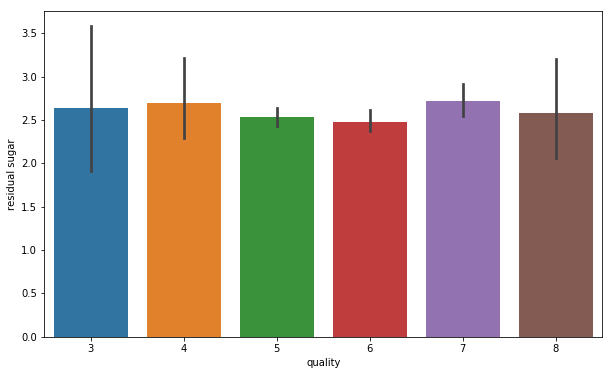

In [9]:
#Let us analyze the residual sugar against the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

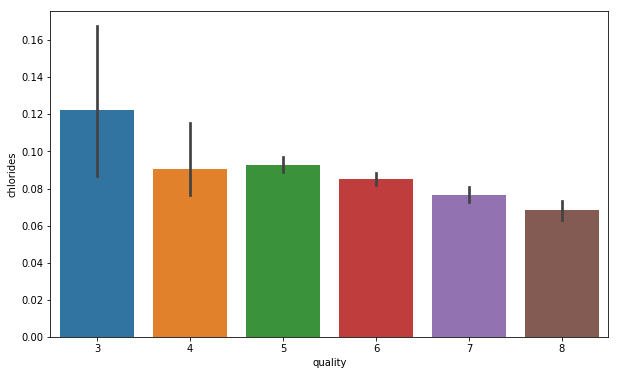

In [10]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

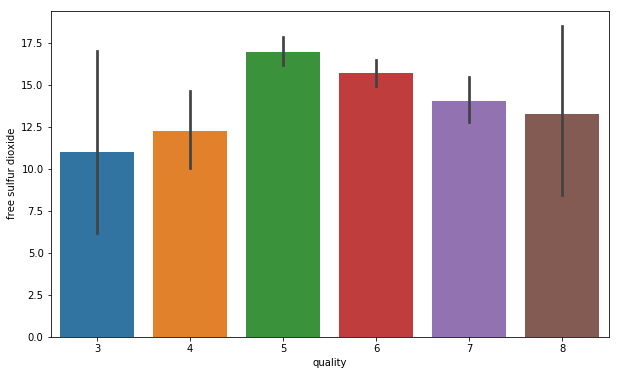

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

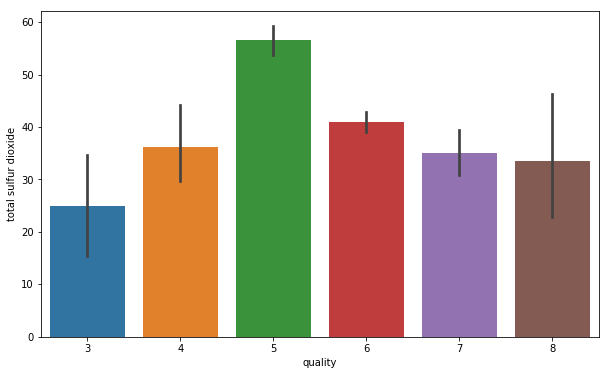

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

##### We observe that free sulfur dioxide and total sulfur dioxide content does not have a visible trend against quality of the wine

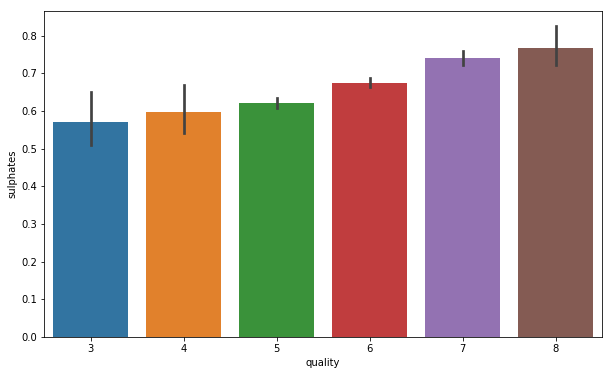

In [13]:
# This plot will give sulphates vs quality of wine relation
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

##### Sulphates level goes higher with the quality of wine


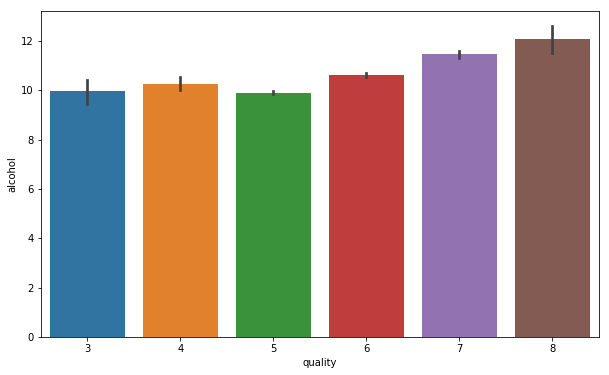

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

##### Alcohol level also goes higher as the quality of wine increases, obvious! ;)


#### Let us plot the correlation matrix and get the sense of the correlation of independent variables on the dependent variable. 

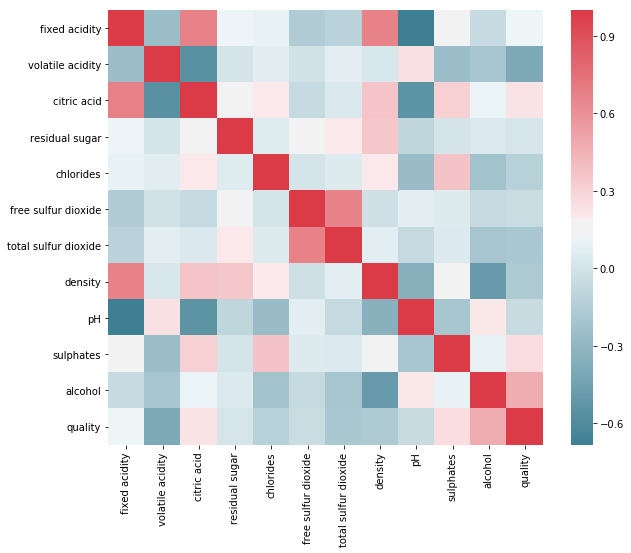

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = wine.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


#### Features like volatile acidity, alcohol, chlorides are correlated to quality of alcohol to a great extent. That was also seen in the bar plots above. 

## Preprocessing Data for performing Machine learning algorithms

In [16]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

##### We have quality of the wine as discrete variable ranging from 3 to 8. But thinking from a business's perspective, you would want to term the quality as good or bad. Hence we will convert the responce variable into binary variable. Dividing wine as good and bad by giving the limit for the quality

In [17]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [18]:
#As we know no ML algorithm takes the textual data in, we'll convert it into 0/1
label_quality = LabelEncoder()

In [19]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [20]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

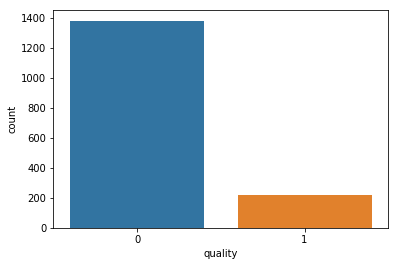

In [21]:
sns.countplot(wine['quality'])

#### **PS.- Take a note of the skewness of the data!**

In [22]:
#Separating the X and Y variable
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [23]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= wine['quality'], random_state = 42)

#### Using the stratify parameter we can guarantee that both our train and test sets have the same proportion of both classes. 
#### We must make sure our train data is as close as possible to the data it is going to be evaluated on.

In [24]:
print (y_train.value_counts())
print (y_test.value_counts())

0    1105
1     174
Name: quality, dtype: int64
0    277
1     43
Name: quality, dtype: int64


#### Applying Standard scaling to get optimized result. 
#### Though a tree based algorithm does not have any effect of scaling, it is still a good practice to do so. Because you will may not apply only a single algorithm on the given data.


In [25]:
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Our training and testing data is ready now to perform machine learning algorithm

### Let us apply the simple logistic regression algorithm first. 

In [27]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
pred_lr= lr.predict(X_test)

In [28]:
print (accuracy_score(y_test, pred_lr))

0.89375


#### Accuracy score is very impressive. Let us check the confusion matrix

In [29]:
print(confusion_matrix(y_test, pred_lr))

[[269   8]
 [ 26  17]]


#### Confusion matrix tells us that the count of false negative is quite high (higher than true positive). FN= 26, TP= 17
#### Hence it is good idea to check the f1 score as well

In [30]:
print (f1_score(y_test, pred_lr))

0.5


#### There is a scope to improve f1 score. 

### Now we will apply Random Forest Classifier

In [31]:
rfc = RandomForestClassifier(n_estimators=10, random_state=2)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [32]:
accuracy_score(y_test, pred_rfc)

0.91875

In [33]:
f1_score(y_test, pred_rfc)

0.6060606060606061

#### Using random forest, the f1 score is improved. We can further improve it by using grid search CV. 

### Grid Search CV

In [34]:
#Let us list down the parameters to keep in the grid. 
parameters = {'n_estimators': [30, 40, 50,100,200,300], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy','gini'],
              'max_depth': [10, 15, 18, 20, 25, 30], 
              'min_samples_split': [2, 3, 5, 7],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(f1_score)

In [35]:
clf2= GridSearchCV(RandomForestClassifier(), parameters, scoring= acc_scorer, cv=8,n_jobs=-1)

In [ ]:
clf2.fit(X_train, y_train)

In [57]:
#pred_rfc2 = clf2.predict(X_test)

In [66]:
#print ("f1 score is ", f1_score(y_test, pred_rfc2))

In [ ]:
# Best parameters from the grid search cv are:
# {'criterion': 'gini',
#  'max_depth': 20,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 3,
#  'n_estimators': 100}

#### Now we will directly put these parameters into a new random forest model. 

In [79]:
rfc3 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=20,max_features='sqrt',
                              min_samples_leaf=1,min_samples_split=3, random_state=2  )

In [80]:
rfc3.fit(X_train, y_train)
pred_rfc3= rfc3.predict(X_test)

In [82]:
print ("f1 score is ", f1_score(y_test, pred_rfc3))
print ("Accuracy is ", accuracy_score(y_test, pred_rfc3))

f1 score is  0.7142857142857142
Accuracy is  0.9375


#### We see that f1 score is imrpoved. So as the accuracy. This concludes the coding simulation of random forrest algorithm. 